In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
requests.__path__

['/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/requests']

In [3]:
url = "https://www.pro-football-reference.com/"
response = requests.get(url)

In [4]:
response.status_code

200

In [5]:
#print(response.text)

In [6]:
page = response.text

In [7]:
nfl_soup = BeautifulSoup(page, "html")
#print(nfl_soup.prettify())
#print(nfl_soup)

In [8]:
len(nfl_soup.find_all('a'))

477

In [9]:
nfl_teams_set = set(link["href"] for link in nfl_soup.find_all('a') if "teams" in str(link))

#remove dups
nfl_teams_list = list(nfl_teams_set)
nfl_teams_list


['/teams/rai/',
 '/teams/cin/2018.htm',
 '/teams/ram/2019.htm',
 '/teams/nyg/2018.htm',
 '/teams/tam/',
 '/teams/det/2018.htm',
 '/teams/nwe/2019.htm',
 '/teams/jax/2018.htm',
 '/teams/buf/2019.htm',
 '/teams/det/2019.htm',
 '/teams/kan/2018.htm',
 '/teams/',
 '/teams/nwe/2018.htm',
 '/teams/mia/2019.htm',
 '/teams/phi/2018.htm',
 '/teams/min/2019.htm',
 '/teams/nor/2018.htm',
 '/teams/nyg/2019.htm',
 '/teams/car/2018.htm',
 '/teams/clt/2018.htm',
 '/teams/tam/2019.htm',
 '/teams/chi/2018.htm',
 '/teams/rai/2018.htm',
 '/teams/pit/2018.htm',
 '/teams/den/2019.htm',
 '/teams/jax/2019.htm',
 '/teams/rav/2018.htm',
 '/teams/gnb/2018.htm',
 '/teams/nor/2019.htm',
 '/teams/gnb/2019.htm',
 '/teams/dal/2018.htm',
 '/teams/den/2018.htm',
 '/teams/atl/2018.htm',
 '/teams/crd/2018.htm',
 '/teams/sea/2019.htm',
 '/teams/cin/2019.htm',
 '/teams/phi/2019.htm',
 '/teams/was/2019.htm',
 '/teams/crd/2019.htm',
 '/teams/min/2018.htm',
 '/teams/chi/2019.htm',
 '/teams/det/',
 '/teams/kan/2019.htm',
 '/t

In [10]:
nfl_team_links = []
for ele in nfl_teams_list:
    if ele[-5] == '8':
        nfl_team_links.append(ele)
        #nfl_teams_list.remove(ele)
nfl_team_links

['/teams/cin/2018.htm',
 '/teams/nyg/2018.htm',
 '/teams/det/2018.htm',
 '/teams/jax/2018.htm',
 '/teams/kan/2018.htm',
 '/teams/nwe/2018.htm',
 '/teams/phi/2018.htm',
 '/teams/nor/2018.htm',
 '/teams/car/2018.htm',
 '/teams/clt/2018.htm',
 '/teams/chi/2018.htm',
 '/teams/rai/2018.htm',
 '/teams/pit/2018.htm',
 '/teams/rav/2018.htm',
 '/teams/gnb/2018.htm',
 '/teams/dal/2018.htm',
 '/teams/den/2018.htm',
 '/teams/atl/2018.htm',
 '/teams/crd/2018.htm',
 '/teams/min/2018.htm',
 '/teams/mia/2018.htm',
 '/teams/sea/2018.htm',
 '/teams/sfo/2018.htm',
 '/teams/was/2018.htm',
 '/teams/oti/2018.htm',
 '/teams/sdg/2018.htm',
 '/teams/nyj/2018.htm',
 '/teams/htx/2018.htm',
 '/teams/buf/2018.htm',
 '/teams/tam/2018.htm',
 '/teams/cle/2018.htm',
 '/teams/ram/2018.htm']

In [11]:
print(nfl_team_links)

['/teams/cin/2018.htm', '/teams/nyg/2018.htm', '/teams/det/2018.htm', '/teams/jax/2018.htm', '/teams/kan/2018.htm', '/teams/nwe/2018.htm', '/teams/phi/2018.htm', '/teams/nor/2018.htm', '/teams/car/2018.htm', '/teams/clt/2018.htm', '/teams/chi/2018.htm', '/teams/rai/2018.htm', '/teams/pit/2018.htm', '/teams/rav/2018.htm', '/teams/gnb/2018.htm', '/teams/dal/2018.htm', '/teams/den/2018.htm', '/teams/atl/2018.htm', '/teams/crd/2018.htm', '/teams/min/2018.htm', '/teams/mia/2018.htm', '/teams/sea/2018.htm', '/teams/sfo/2018.htm', '/teams/was/2018.htm', '/teams/oti/2018.htm', '/teams/sdg/2018.htm', '/teams/nyj/2018.htm', '/teams/htx/2018.htm', '/teams/buf/2018.htm', '/teams/tam/2018.htm', '/teams/cle/2018.htm', '/teams/ram/2018.htm']


In [12]:
len(nfl_team_links)

32

In [13]:
for idx, second_half_url in enumerate(nfl_team_links):
    nfl_team_links[idx] = "https://www.pro-football-reference.com" + second_half_url
nfl_team_links

['https://www.pro-football-reference.com/teams/cin/2018.htm',
 'https://www.pro-football-reference.com/teams/nyg/2018.htm',
 'https://www.pro-football-reference.com/teams/det/2018.htm',
 'https://www.pro-football-reference.com/teams/jax/2018.htm',
 'https://www.pro-football-reference.com/teams/kan/2018.htm',
 'https://www.pro-football-reference.com/teams/nwe/2018.htm',
 'https://www.pro-football-reference.com/teams/phi/2018.htm',
 'https://www.pro-football-reference.com/teams/nor/2018.htm',
 'https://www.pro-football-reference.com/teams/car/2018.htm',
 'https://www.pro-football-reference.com/teams/clt/2018.htm',
 'https://www.pro-football-reference.com/teams/chi/2018.htm',
 'https://www.pro-football-reference.com/teams/rai/2018.htm',
 'https://www.pro-football-reference.com/teams/pit/2018.htm',
 'https://www.pro-football-reference.com/teams/rav/2018.htm',
 'https://www.pro-football-reference.com/teams/gnb/2018.htm',
 'https://www.pro-football-reference.com/teams/dal/2018.htm',
 'https:

In [14]:
print(nfl_team_links[0], type(nfl_team_links[0]))

https://www.pro-football-reference.com/teams/cin/2018.htm <class 'str'>


In [15]:
url = 'https://www.pro-football-reference.com/teams/sdg/2018.htm'
response = requests.get(url)
response.status_code

200

In [16]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import chromedriver_binary

## Try Selenium with just the Chargers

In [17]:
driver = webdriver.Chrome()
driver.get(url)

In [18]:
soup_selenium = BeautifulSoup(driver.page_source)

In [19]:
chargers_df = pd.read_html(str(soup_selenium.find(id='rushing_and_receiving')))[0]
chargers_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                 No.             Player                Age                Pos   
0               28.0     Melvin Gordon*               25.0                 RB   
1               30.0      Austin Ekeler               23.0                 rb   
2               32.0     Justin Jackson               23.0                 rb   
3               17.0     Philip Rivers*               37.0                 QB   
4               38.0     Detrez Newsome               24.0                NaN   

  Games       Rushing                 ... Receiving                           \
      G    GS     Att  Yds  TD   Lng  ...       Lng  R/G   Y/G   Ctch% Y/Tgt   
0    12  12.0     175  885  10  34.0  ...      66.0  4.2  40.8   75.8%   7.4   
1    14   3.0     106  554   3  41.0  ...      44.0  2.8  28.9   73.6%   7.6   
2    13   1.0      50  206   2  20.0  ...      19.0  1.2  10.4   78.9%   7.1   
3    16  16.0      18    7   0   7.0  ...       NaN  NaN   NaN     NaN   NaN   
4     9   0.0      11   49   0  16.0  ...      11.0  0.2   2.1  100.0%   9.5   

  Total Yds             Unnamed: 26_level_0 Unnamed: 27_level_0  
      Touch Y/Tch  YScm                RRTD                 Fmb  
0     225.0   6.1  1375                  14                   1  
1     145.0   6.6   958                   6                   1  
2      65.0   5.2   341                   2                   0  
3      18.0   0.4     7                   0                   2  
4      13.0   5.2    68                   0                   0  

[5 rows x 28 columns]

In [20]:
driver.quit()

In [21]:
chargers_df.columns = ['No','Player','Age','Pos','G','GS','Att','Rush_Yds','Rush_TD','Lng_Rush',
                       'Y/A','Rush_Y/G','A/G','Tgt','Rec','Rec_Yds','Y/R','Rec_TD','Lng_Rec','R/G',
                       'Rec_Y/G','Ctch%','Y/Tgt','Touch','Y/Tch','YScm','RRTD','Fmb']
chargers_df

,No,Player,Age,Pos,G,GS,Att,Rush_Yds,Rush_TD,Lng_Rush,...,Lng_Rec,R/G,Rec_Y/G,Ctch%,Y/Tgt,Touch,Y/Tch,YScm,RRTD,Fmb
0,28.0,Melvin Gordon*,25.0,RB,12,12.0,175,885,10,34.0,...,66.0,4.2,40.8,75.8%,7.4,225.0,6.1,1375,14,1
1,30.0,Austin Ekeler,23.0,rb,14,3.0,106,554,3,41.0,...,44.0,2.8,28.9,73.6%,7.6,145.0,6.6,958,6,1
2,32.0,Justin Jackson,23.0,rb,13,1.0,50,206,2,20.0,...,19.0,1.2,10.4,78.9%,7.1,65.0,5.2,341,2,0
3,17.0,Philip Rivers*,37.0,QB,16,16.0,18,7,0,7.0,...,NaN,NaN,NaN,NaN,NaN,18.0,0.4,7,0,2
4,38.0,Detrez Newsome,24.0,NaN,9,0.0,11,49,0,16.0,...,11.0,0.2,2.1,100.0%,9.5,13.0,5.2,68,0,0
5,13.0,Keenan Allen*,26.0,WR,16,14.0,9,75,0,28.0,...,54.0,6.1,74.8,71.3%,8.8,106.0,12.0,1271,6,3
6,3.0,Geno Smith,28.0,NaN,5,0.0,8,2,0,9.0,...,NaN,NaN,NaN,NaN,NaN,8.0,0.3,2,0,1
7,81.0,Mike Williams,24.0,wr,16,5.0,7,28,1,19.0,...,55.0,2.7,41.5,65.2%,10.1,50.0,13.8,692,11,0
8,12.0,Travis Benjamin,29.0,wr,12,3.0,7,41,0,19.0,...,46.0,1.0,15.5,50.0%,7.8,19.0,11.9,227,1,0
9,34.0,Derek Watt,26.0,fb,16,5.0,4,11,0,8.0,...,2.0,0.1,0.1,100.0%,2.0,5.0,2.6,13,0,0


## Selenium for all the team links

In [22]:
df_columns = ['No','Player','Age','Pos','G','GS','Att','Rush_Yds','Rush_TD','Lng_Rush',
                       'Y/A','Rush_Y/G','A/G','Tgt','Rec','Rec_Yds','Y/R','Rec_TD','Lng_Rec','R/G',
                       'Rec_Y/G','Ctch%','Y/Tgt','Touch','Y/Tch','YScm','RRTD','Fmb']

In [23]:
#maybe dont need this.
team_abbrev = []
for team in nfl_team_links:
    team_abbrev.append(team[-12:-9])
print(team_abbrev)

['cin', 'nyg', 'det', 'jax', 'kan', 'nwe', 'phi', 'nor', 'car', 'clt', 'chi', 'rai', 'pit', 'rav', 'gnb', 'dal', 'den', 'atl', 'crd', 'min', 'mia', 'sea', 'sfo', 'was', 'oti', 'sdg', 'nyj', 'htx', 'buf', 'tam', 'cle', 'ram']


In [24]:
def df_for_each_team(team_url):
    driver = webdriver.Chrome()
    driver.get(team_url)
    soup_selenium = BeautifulSoup(driver.page_source)
    df_each_team = pd.read_html(str(soup_selenium.find(id='rushing_and_receiving')))[0]
    df_each_team.columns = df_columns
    driver.quit()
    return(df_each_team)

In [25]:
#Make a blank DF to concat in teams loop
df = pd.DataFrame(columns=df_columns)
df

,No,Player,Age,Pos,G,GS,Att,Rush_Yds,Rush_TD,Lng_Rush,...,Lng_Rec,R/G,Rec_Y/G,Ctch%,Y/Tgt,Touch,Y/Tch,YScm,RRTD,Fmb


In [26]:
#Union all the teams' tables together
for team in nfl_team_links:
    df = df.append(df_for_each_team(team))

In [27]:
df.reset_index(inplace=True)

In [28]:
df

,index,No,Player,Age,Pos,G,GS,Att,Rush_Yds,Rush_TD,...,Lng_Rec,R/G,Rec_Y/G,Ctch%,Y/Tgt,Touch,Y/Tch,YScm,RRTD,Fmb
0,0,28.0,Joe Mixon,22.0,RB,14,13.0,237,1168,8,...,21.0,3.1,21.1,78.2%,5.4,280.0,5.2,1464,9,0
1,1,25.0,Giovani Bernard,27.0,rb,12,4.0,56,211,3,...,26.0,2.9,18.2,72.9%,4.5,91.0,4.7,429,3,0
2,2,6.0,Jeff Driskel,25.0,qb,9,5.0,25,130,2,...,NaN,NaN,NaN,NaN,NaN,25.0,5.2,130,2,4
3,3,14.0,Andy Dalton,31.0,QB,11,11.0,16,99,0,...,NaN,NaN,NaN,NaN,NaN,16.0,6.2,99,0,1
4,4,32.0,Mark Walton,21.0,NaN,14,0.0,14,34,0,...,24.0,0.4,2.9,62.5%,5.1,19.0,3.9,75,0,0
5,5,15.0,John Ross,24.0,WR,13,10.0,4,9,0,...,39.0,1.6,16.2,36.2%,3.6,25.0,8.8,219,7,0
6,6,12.0,Alex Erickson,26.0,wr,16,6.0,3,22,0,...,28.0,1.3,10.4,69.0%,5.8,23.0,8.2,189,0,1
7,7,83.0,Tyler Boyd,24.0,WR,14,14.0,2,3,0,...,49.0,5.4,73.4,70.4%,9.5,78.0,13.2,1031,7,0
8,8,42.0,Clayton Fejedelem,25.0,db,16,1.0,2,6,0,...,NaN,NaN,NaN,NaN,NaN,2.0,3.0,6,0,1
9,9,18.0,A.J. Green,30.0,WR,9,9.0,0,0,0,...,38.0,5.1,77.1,59.7%,9.0,46.0,15.1,694,6,2


## Now time to clean the data!

In [29]:
df.drop(columns=['index'],inplace=True)
df.head()

,No,Player,Age,Pos,G,GS,Att,Rush_Yds,Rush_TD,Lng_Rush,...,Lng_Rec,R/G,Rec_Y/G,Ctch%,Y/Tgt,Touch,Y/Tch,YScm,RRTD,Fmb
0,28.0,Joe Mixon,22.0,RB,14,13.0,237,1168,8,51.0,...,21.0,3.1,21.1,78.2%,5.4,280.0,5.2,1464,9,0
1,25.0,Giovani Bernard,27.0,rb,12,4.0,56,211,3,23.0,...,26.0,2.9,18.2,72.9%,4.5,91.0,4.7,429,3,0
2,6.0,Jeff Driskel,25.0,qb,9,5.0,25,130,2,27.0,...,NaN,NaN,NaN,NaN,NaN,25.0,5.2,130,2,4
3,14.0,Andy Dalton,31.0,QB,11,11.0,16,99,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,6.2,99,0,1
4,32.0,Mark Walton,21.0,NaN,14,0.0,14,34,0,10.0,...,24.0,0.4,2.9,62.5%,5.1,19.0,3.9,75,0,0


In [30]:
import copy
df_nfl = copy.deepcopy(df)

In [31]:
#Delete the NaN columns from the players' numbers column, b/c each NaN is a aggregation row from the
#original tables on the nfl website.
df_nfl['No'].unique()

array([28., 25.,  6., 14., 32., 15., 12., 83., 42., 18., 87., 85., 16.,
       81., 19., 89., 88., 80., nan, 26., 22., 10., 39., 23., 13., 17.,
        8., 82., 77., 29., 33., 34.,  9.,  1., 43., 21., 11., 84., 68.,
       27., 24.,  5., 30., 31., 40., 86.,  4., 38.,  2., 46., 47.,  7.,
       41., 20., 48., 45., 78., 96., 79., 35., 37., 36., 49.,  3., 44.,
       74., 54., 73., 95.])

In [32]:
df_nfl = df_nfl[pd.notnull(df_nfl['No'])]

In [33]:
print('The shape is: ', df_nfl.shape)

The shape is:  (595, 28)


In [34]:
df_nfl_cols = df_nfl.columns
df_nfl_cols

Index(['No', 'Player', 'Age', 'Pos', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD',
       'Lng_Rush', 'Y/A', 'Rush_Y/G', 'A/G', 'Tgt', 'Rec', 'Rec_Yds', 'Y/R',
       'Rec_TD', 'Lng_Rec', 'R/G', 'Rec_Y/G', 'Ctch%', 'Y/Tgt', 'Touch',
       'Y/Tch', 'YScm', 'RRTD', 'Fmb'],
      dtype='object')

In [35]:
pass

In [36]:
df_nfl = df_nfl.reset_index()
df_nfl

,index,No,Player,Age,Pos,G,GS,Att,Rush_Yds,Rush_TD,...,Lng_Rec,R/G,Rec_Y/G,Ctch%,Y/Tgt,Touch,Y/Tch,YScm,RRTD,Fmb
0,0,28.0,Joe Mixon,22.0,RB,14,13.0,237,1168,8,...,21.0,3.1,21.1,78.2%,5.4,280.0,5.2,1464,9,0
1,1,25.0,Giovani Bernard,27.0,rb,12,4.0,56,211,3,...,26.0,2.9,18.2,72.9%,4.5,91.0,4.7,429,3,0
2,2,6.0,Jeff Driskel,25.0,qb,9,5.0,25,130,2,...,NaN,NaN,NaN,NaN,NaN,25.0,5.2,130,2,4
3,3,14.0,Andy Dalton,31.0,QB,11,11.0,16,99,0,...,NaN,NaN,NaN,NaN,NaN,16.0,6.2,99,0,1
4,4,32.0,Mark Walton,21.0,NaN,14,0.0,14,34,0,...,24.0,0.4,2.9,62.5%,5.1,19.0,3.9,75,0,0
5,5,15.0,John Ross,24.0,WR,13,10.0,4,9,0,...,39.0,1.6,16.2,36.2%,3.6,25.0,8.8,219,7,0
6,6,12.0,Alex Erickson,26.0,wr,16,6.0,3,22,0,...,28.0,1.3,10.4,69.0%,5.8,23.0,8.2,189,0,1
7,7,83.0,Tyler Boyd,24.0,WR,14,14.0,2,3,0,...,49.0,5.4,73.4,70.4%,9.5,78.0,13.2,1031,7,0
8,8,42.0,Clayton Fejedelem,25.0,db,16,1.0,2,6,0,...,NaN,NaN,NaN,NaN,NaN,2.0,3.0,6,0,1
9,9,18.0,A.J. Green,30.0,WR,9,9.0,0,0,0,...,38.0,5.1,77.1,59.7%,9.0,46.0,15.1,694,6,2


In [37]:
df_nfl.shape

(595, 29)

In [38]:
df_nfl = df_nfl.drop(columns=['index'])

In [39]:
df_nfl

,No,Player,Age,Pos,G,GS,Att,Rush_Yds,Rush_TD,Lng_Rush,...,Lng_Rec,R/G,Rec_Y/G,Ctch%,Y/Tgt,Touch,Y/Tch,YScm,RRTD,Fmb
0,28.0,Joe Mixon,22.0,RB,14,13.0,237,1168,8,51.0,...,21.0,3.1,21.1,78.2%,5.4,280.0,5.2,1464,9,0
1,25.0,Giovani Bernard,27.0,rb,12,4.0,56,211,3,23.0,...,26.0,2.9,18.2,72.9%,4.5,91.0,4.7,429,3,0
2,6.0,Jeff Driskel,25.0,qb,9,5.0,25,130,2,27.0,...,NaN,NaN,NaN,NaN,NaN,25.0,5.2,130,2,4
3,14.0,Andy Dalton,31.0,QB,11,11.0,16,99,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,6.2,99,0,1
4,32.0,Mark Walton,21.0,NaN,14,0.0,14,34,0,10.0,...,24.0,0.4,2.9,62.5%,5.1,19.0,3.9,75,0,0
5,15.0,John Ross,24.0,WR,13,10.0,4,9,0,7.0,...,39.0,1.6,16.2,36.2%,3.6,25.0,8.8,219,7,0
6,12.0,Alex Erickson,26.0,wr,16,6.0,3,22,0,14.0,...,28.0,1.3,10.4,69.0%,5.8,23.0,8.2,189,0,1
7,83.0,Tyler Boyd,24.0,WR,14,14.0,2,3,0,5.0,...,49.0,5.4,73.4,70.4%,9.5,78.0,13.2,1031,7,0
8,42.0,Clayton Fejedelem,25.0,db,16,1.0,2,6,0,6.0,...,NaN,NaN,NaN,NaN,NaN,2.0,3.0,6,0,1
9,18.0,A.J. Green,30.0,WR,9,9.0,0,0,0,0.0,...,38.0,5.1,77.1,59.7%,9.0,46.0,15.1,694,6,2


In [40]:
#find the nans in each col
for col in df_columns:
    print(df_nfl[col].isnull().value_counts(), '\n')

False    595
Name: No, dtype: int64 

False    595
Name: Player, dtype: int64 

False    595
Name: Age, dtype: int64 

False    449
True     146
Name: Pos, dtype: int64 

False    595
Name: G, dtype: int64 

False    595
Name: GS, dtype: int64 

False    595
Name: Att, dtype: int64 

False    595
Name: Rush_Yds, dtype: int64 

False    595
Name: Rush_TD, dtype: int64 

False    595
Name: Lng_Rush, dtype: int64 

False    348
True     247
Name: Y/A, dtype: int64 

False    595
Name: Rush_Y/G, dtype: int64 

False    595
Name: A/G, dtype: int64 

False    517
True      78
Name: Tgt, dtype: int64 

False    517
True      78
Name: Rec, dtype: int64 

False    517
True      78
Name: Rec_Yds, dtype: int64 

False    510
True      85
Name: Y/R, dtype: int64 

False    517
True      78
Name: Rec_TD, dtype: int64 

False    517
True      78
Name: Lng_Rec, dtype: int64 

False    517
True      78
Name: R/G, dtype: int64 

False    517
True      78
Name: Rec_Y/G, dtype: int64 

False    517
True 

In [41]:
#col that filling NaN with 0 makes sense
fill_zero_cols = ['No', 'Age', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD',
       'Lng_Rush', 'Y/A', 'Rush_Y/G', 'A/G', 'Tgt', 'Rec', 'Rec_Yds', 'Y/R',
       'Rec_TD', 'Lng_Rec', 'R/G', 'Rec_Y/G', 'Y/Tgt', 'Touch',
       'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'Ctch%']
for col in fill_zero_cols:
    df_nfl[col].fillna(value=0,inplace=True)

In [42]:
for col in df_columns:
    print(df_nfl[col].isnull().value_counts(), '\n')

False    595
Name: No, dtype: int64 

False    595
Name: Player, dtype: int64 

False    595
Name: Age, dtype: int64 

False    449
True     146
Name: Pos, dtype: int64 

False    595
Name: G, dtype: int64 

False    595
Name: GS, dtype: int64 

False    595
Name: Att, dtype: int64 

False    595
Name: Rush_Yds, dtype: int64 

False    595
Name: Rush_TD, dtype: int64 

False    595
Name: Lng_Rush, dtype: int64 

False    595
Name: Y/A, dtype: int64 

False    595
Name: Rush_Y/G, dtype: int64 

False    595
Name: A/G, dtype: int64 

False    595
Name: Tgt, dtype: int64 

False    595
Name: Rec, dtype: int64 

False    595
Name: Rec_Yds, dtype: int64 

False    595
Name: Y/R, dtype: int64 

False    595
Name: Rec_TD, dtype: int64 

False    595
Name: Lng_Rec, dtype: int64 

False    595
Name: R/G, dtype: int64 

False    595
Name: Rec_Y/G, dtype: int64 

False    595
Name: Ctch%, dtype: int64 

False    595
Name: Y/Tgt, dtype: int64 

False    595
Name: Touch, dtype: int64 

False    595

In [43]:
#fill the postion col with a string rather than 0
df_nfl['Pos'].fillna(value='no_pos_listed',inplace=True)
df_nfl['Pos'].isnull().value_counts()

False    595
Name: Pos, dtype: int64

In [44]:
df_nfl.dtypes

No          float64
Player       object
Age         float64
Pos          object
G             int64
GS          float64
Att           int64
Rush_Yds      int64
Rush_TD       int64
Lng_Rush    float64
Y/A         float64
Rush_Y/G    float64
A/G         float64
Tgt         float64
Rec         float64
Rec_Yds     float64
Y/R         float64
Rec_TD      float64
Lng_Rec     float64
R/G         float64
Rec_Y/G     float64
Ctch%        object
Y/Tgt       float64
Touch       float64
Y/Tch       float64
YScm          int64
RRTD          int64
Fmb           int64
dtype: object

In [45]:
df_nfl.isnull().nunique()

No          1
Player      1
Age         1
Pos         1
G           1
GS          1
Att         1
Rush_Yds    1
Rush_TD     1
Lng_Rush    1
Y/A         1
Rush_Y/G    1
A/G         1
Tgt         1
Rec         1
Rec_Yds     1
Y/R         1
Rec_TD      1
Lng_Rec     1
R/G         1
Rec_Y/G     1
Ctch%       1
Y/Tgt       1
Touch       1
Y/Tch       1
YScm        1
RRTD        1
Fmb         1
dtype: int64

In [46]:
#Change appropriate cols to type int
int_cols = ['No', 'Age', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD', 'Lng_Rush', 'Tgt', 'Rec', 'Rec_Yds',
            'Rec_TD', 'Lng_Rec', 'Touch', 'YScm', 'RRTD', 'Fmb']
df_nfl[int_cols] = df_nfl[int_cols].astype(int)

In [47]:
df_nfl['Player'][0]

'Joe Mixon'

In [48]:
#Generate dummy variable column for probowl, set to 0 initially
df_nfl['pro_bowl'] = 0
df_nfl['pro_bowl']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
565    0
566    0
567    0
568    0
569    0
570    0
571    0
572    0
573    0
574    0
575    0
576    0
577    0
578    0
579    0
580    0
581    0
582    0
583    0
584    0
585    0
586    0
587    0
588    0
589    0
590    0
591    0
592    0
593    0
594    0
Name: pro_bowl, Length: 595, dtype: int64

In [49]:
for idx, player in enumerate(df_nfl['Player']):
    if df_nfl['Player'][idx][-1] == '*':
        df_nfl['pro_bowl'][idx] = 1

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
df_nfl['pro_bowl'].value_counts()

0    557
1     38
Name: pro_bowl, dtype: int64

In [51]:
df_nfl['Ctch%'] = df_nfl['Ctch%'].astype(str)
df_nfl['Ctch%'].dtypes

dtype('O')

In [52]:
#Get rid of the % in the string
for idx, player in enumerate(df_nfl['Ctch%']):
    if df_nfl['Ctch%'][idx][-1] == '%':
        df_nfl['Ctch%'][idx] = df_nfl['Ctch%'][idx][:-1]

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [53]:
#change catch % to a decimal
df_nfl['Ctch%'] = df_nfl['Ctch%'].astype(float)/100
df_nfl['Ctch%'].unique()

array([0.782, 0.729, 0.   , 0.625, 0.362, 0.69 , 0.704, 0.597, 0.672,
       0.789, 0.464, 0.667, 0.333, 0.375, 0.2  , 0.752, 0.636, 0.889,
       0.621, 0.617, 0.703, 0.735, 0.593, 0.688, 0.526, 0.643, 0.5  ,
       1.   , 0.821, 0.7  , 0.824, 0.638, 0.588, 0.767, 0.647, 0.565,
       0.875, 0.731, 0.684, 0.458, 0.45 , 0.846, 0.705, 0.571, 0.75 ,
       0.653, 0.769, 0.539, 0.543, 0.632, 0.438, 0.579, 0.727, 0.743,
       0.87 , 0.958, 0.635, 0.6  , 0.687, 0.615, 0.48 , 0.4  , 0.707,
       0.685, 0.706, 0.762, 0.8  , 0.538, 0.88 , 0.833, 0.652, 0.66 ,
       0.682, 0.744, 0.714, 0.857, 0.455, 0.771, 0.778, 0.429, 0.567,
       0.85 , 0.761, 0.619, 0.9  , 0.863, 0.671, 0.557, 0.711, 0.548,
       0.654, 0.941, 0.587, 0.736, 0.633, 0.673, 0.718, 0.788, 0.78 ,
       0.72 , 0.611, 0.585, 0.56 , 0.84 , 0.716, 0.71 , 0.484, 0.909,
       0.583, 0.775, 0.897, 0.818, 0.669, 0.694, 0.421, 0.231, 0.814,
       0.76 , 0.433, 0.54 , 0.68 , 0.622, 0.659, 0.521, 0.657, 0.618,
       0.623, 0.811,

In [54]:
df_nfl.Pos.unique()

array(['RB', 'rb', 'qb', 'QB', 'no_pos_listed', 'WR', 'wr', 'db', 'TE',
       'te', 'P', 'C', 'rb/wr', 'fb', 'db/s/ss', 'T', 'fb/rb/te', 'rb/WR',
       'te/wr', 'fb/wr', 'DT/ldt', 'cb', 'fs/SS', 'fb/rb/wr', 'FB',
       'rb/te', 't/te', 'lcb/wr', 'DE', 'fs', 'TE/wr', 'dt/LDT/rdt',
       'cb/rcb'], dtype=object)

In [55]:
#May need to come back and clean more..
for idx, player in enumerate(df_nfl['Pos']):
        df_nfl['Pos'][idx] = df_nfl['Pos'][idx].upper()

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
df_nfl.head()

,No,Player,Age,Pos,G,GS,Att,Rush_Yds,Rush_TD,Lng_Rush,...,R/G,Rec_Y/G,Ctch%,Y/Tgt,Touch,Y/Tch,YScm,RRTD,Fmb,pro_bowl
0,28,Joe Mixon,22,RB,14,13,237,1168,8,51,...,3.1,21.1,0.782,5.4,280,5.2,1464,9,0,0
1,25,Giovani Bernard,27,RB,12,4,56,211,3,23,...,2.9,18.2,0.729,4.5,91,4.7,429,3,0,0
2,6,Jeff Driskel,25,QB,9,5,25,130,2,27,...,0.0,0.0,0.000,0.0,25,5.2,130,2,4,0
3,14,Andy Dalton,31,QB,11,11,16,99,0,21,...,0.0,0.0,0.000,0.0,16,6.2,99,0,1,0
4,32,Mark Walton,21,NO_POS_LISTED,14,0,14,34,0,10,...,0.4,2.9,0.625,5.1,19,3.9,75,0,0,0


In [57]:
df_nfl.sample(20)

,No,Player,Age,Pos,G,GS,Att,Rush_Yds,Rush_TD,Lng_Rush,...,R/G,Rec_Y/G,Ctch%,Y/Tgt,Touch,Y/Tch,YScm,RRTD,Fmb,pro_bowl
572,25,Dontrell Hilliard,23,NO_POS_LISTED,11,0,0,0,0,0,...,0.8,9.5,0.900,10.5,9,11.7,105,0,0,0
490,10,Jermaine Kearse,28,WR,14,9,0,0,0,0,...,2.6,26.5,0.487,4.9,37,10.0,371,1,0,0
162,17,Devin Funchess,24,WR,14,12,0,0,0,0,...,3.1,39.2,0.557,6.9,44,12.5,549,4,0,0
341,32,Derrick Coleman,28,FB,16,4,2,3,0,2,...,0.1,1.1,0.667,5.7,4,5.0,20,0,0,0
377,11,DeVante Parker,25,WR,11,7,0,0,0,0,...,2.2,28.1,0.511,6.6,24,12.9,309,1,0,0
384,27,Mike Davis,25,RB,15,2,112,514,4,37,...,2.3,14.3,0.810,5.1,146,5.0,728,5,0,0
66,31,Jamaal Charles,32,NO_POS_LISTED,2,0,6,7,0,5,...,1.0,3.5,0.667,2.3,8,1.8,14,0,0,0
238,84,Antonio Brown*,30,WR,15,15,0,0,0,0,...,6.9,86.5,0.619,7.7,104,12.5,1297,15,0,1
261,14,Tim White,24,NO_POS_LISTED,3,0,0,0,0,0,...,0.3,4.7,1.000,14.0,1,14.0,14,0,1,0
478,20,Isaiah Crowell,25,RB,13,6,143,685,6,77,...,1.6,11.7,0.750,5.4,164,5.1,837,6,0,0


In [58]:
df_nfl.to_pickle('proj2_clean.pickle')

In [59]:
!ls|grep proj2

proj2_clean.pickle


In [60]:
!pwd

/Users/alexlou/ds/bootcamp/project2/project_2


## EDA!

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [62]:
df_nfl.columns

Index(['No', 'Player', 'Age', 'Pos', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD',
       'Lng_Rush', 'Y/A', 'Rush_Y/G', 'A/G', 'Tgt', 'Rec', 'Rec_Yds', 'Y/R',
       'Rec_TD', 'Lng_Rec', 'R/G', 'Rec_Y/G', 'Ctch%', 'Y/Tgt', 'Touch',
       'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'pro_bowl'],
      dtype='object')

In [63]:
df_season_totals = df_nfl.loc[:,['Player', 'Pos', 'Touch', 'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'pro_bowl',
                                 'Age', 'G', 'GS']]

In [64]:
df_season_totals.columns

Index(['Player', 'Pos', 'Touch', 'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'pro_bowl',
       'Age', 'G', 'GS'],
      dtype='object')

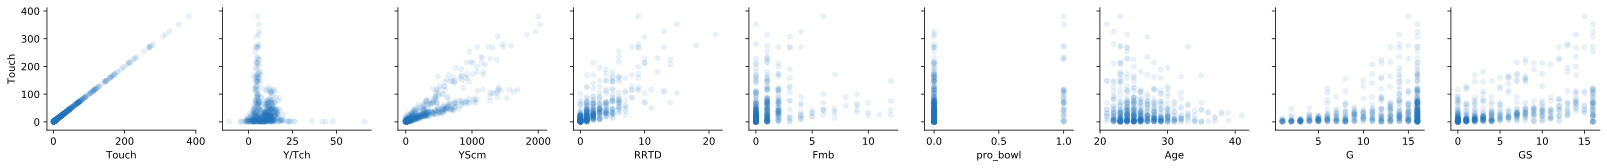

In [91]:
sns.pairplot(df_season_totals, y_vars=["Touch"], x_vars=df_season_totals.columns[2:], 
             plot_kws=dict(alpha=.1, edgecolor='none'))

In [66]:
pass

## MVP

### What what are the feature effects on #Touches that a player sees.

In [135]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [136]:
covariates = ['RRTD', 'YScm', 'Fmb', 'Age', 'G']

In [137]:
X, y = df_season_totals[covariates], df_season_totals['Touch']
print(X.shape, y.shape)

(595, 5) (595,)


In [138]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=127)

In [139]:
# YOUR SOLUTION HERE
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=303)

In [140]:
# Create the model
model = sm.OLS(y_train, X_train)

# Fit the model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Touch   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              345.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):                   2.58e-133
Time:                        14:31:22   Log-Likelihood:                         -1728.7
No. Observations:                 357   AIC:                                      3467.
Df Residuals:                     352   BIC:                                      3487.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RRTD           2.0192      1.148      1.759      0.080      -0.239       4.277
YScm           0.1165      0.009     13.118      0.000       0.099       0.134
Fmb            3.6657      0.813      4.508      0.000       2.066       5.265
Age            0.0265      0.143      0.185      0.853      -0.255       0.308
G             -0.4793      0.366     -1.309      0.191      -1.199       0.241
==============================================================================
Omnibus:                       67.473   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.043
Skew:                           0.793   Prob(JB):                     1.24e-52
Kurtosis:                       6.682   Cond. No.                         366.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

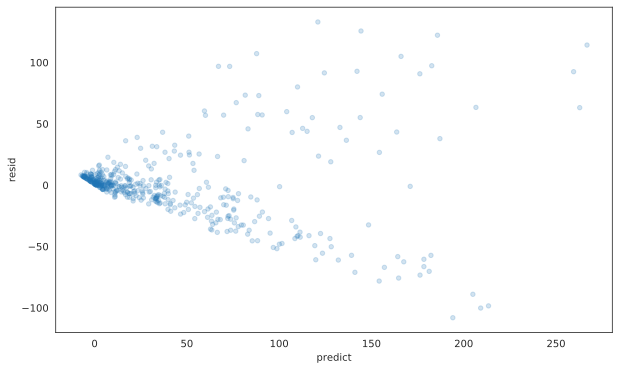

In [141]:
# Check for Heterosk
# Plot your predicted values on the x-axis, and your residuals on the y-axis

df_season_totals['predict']=fit.predict(X)
df_season_totals['resid']=y-df_season_totals.predict
with sns.axes_style('white'):
    plot=df_season_totals.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

## Let's clean up the heteroskedasticity

In [142]:
y_train_log = np.log(y_train)
#y_val_log = np.log(y_val)
y_test_log = np.log(y_test)

In [143]:
# Create the model
model_log_y = sm.OLS(y_train_log, X_train)

# Fit the model to your training set
fit_log_y = model_log_y.fit()

# Print summary statistics of the model's performance
fit_log_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Touch   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              762.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):                   2.19e-186
Time:                        14:31:45   Log-Likelihood:                         -478.84
No. Observations:                 357   AIC:                                      967.7
Df Residuals:                     352   BIC:                                      987.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RRTD           0.0279      0.035      0.806      0.421      -0.040       0.096
YScm           0.0026      0.000      9.730      0.000       0.002       0.003
Fmb            0.1456      0.025      5.934      0.000       0.097       0.194
Age            0.0465      0.004     10.780      0.000       0.038       0.055
G              0.0411      0.011      3.720      0.000       0.019       0.063
==============================================================================
Omnibus:                       12.851   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.342
Skew:                          -0.451   Prob(JB):                      0.00127
Kurtosis:                       2.711   Cond. No.                         366.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

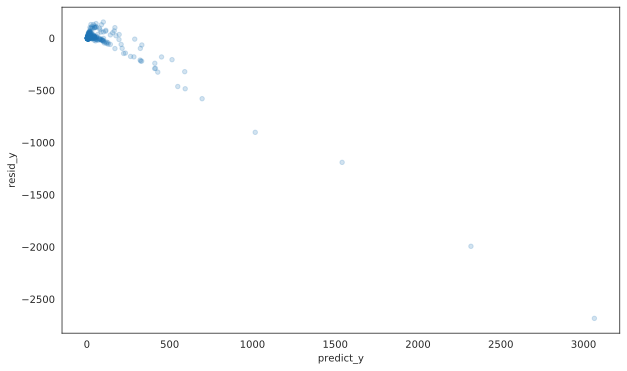

In [144]:
df_season_totals['predict_y'] = np.exp(fit_log_y.predict(X))
df_season_totals['resid_y'] = df_season_totals.Touch - df_season_totals.predict_y
with sns.axes_style('white'):
    plot = df_season_totals.plot(kind='scatter',
                  x='predict_y',y='resid_y',alpha=0.2,figsize=(10,6))

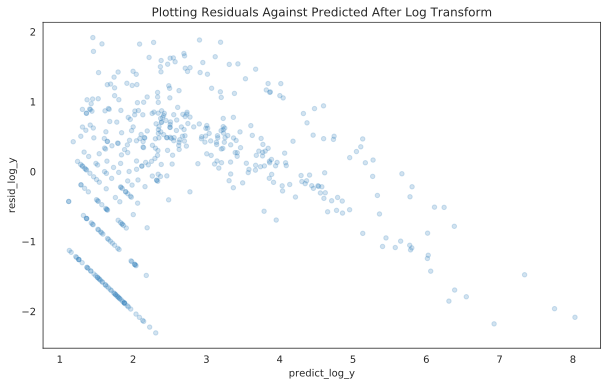

In [145]:
df_season_totals['predict_log_y'] = fit_log_y.predict(X)
df_season_totals['resid_log_y'] = y_log - df_season_totals.predict_log_y
with sns.axes_style('white'):
    plot = df_season_totals.plot(kind='scatter',
                  x='predict_log_y',y='resid_log_y',alpha=0.2,figsize=(10,6),
                                 title="Plotting Residuals Against Predicted After Log Transform")

In [146]:
df_season_totals.head()

,Player,Pos,Touch,Y/Tch,YScm,RRTD,Fmb,pro_bowl,Age,G,GS,predict,resid,predict_log_y,resid_log_y,predict_y,resid_y
0,Joe Mixon,RB,280,5.2,1464,9,0,0,22,14,13,182.664238,97.335762,5.666900,-0.032110,289.136786,-9.136786
1,Giovani Bernard,RB,91,4.7,429,3,0,0,27,12,4,51.018893,39.981107,2.951169,1.559691,19.128296,71.871704
2,Jeff Driskel,QB,25,5.2,130,2,4,0,25,9,5,30.201020,-5.201020,2.509602,0.709274,12.300029,12.699971
3,Andy Dalton,QB,16,6.2,99,0,1,0,31,11,11,NaN,NaN,NaN,NaN,NaN,NaN
4,Mark Walton,NO_POS_LISTED,19,3.9,75,0,0,0,21,14,0,2.587677,16.412323,1.747455,1.196984,5.739977,13.260023


# Let's move on to Logit, and look at probowl




In [150]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import Linear_model, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns

In [149]:
#get rid of the resids analysis from MVP
df_season_totals = df_season_totals.dropna(axis=1)
print(df_season_totals.shape)

(595, 11)


In [134]:
logit_covariates = ['RRTD', 'YScm', 'Fmb', 'Age', 'G', 'Touch']

In [152]:
X_logit, y_logit = df_season_totals[logit_covariates], df_season_totals.pro_bowl
print(X_logit.shape, y_logit.shape)

(595, 6) (595,)


In [153]:
#Test train split
X_logit_train, X_logit_test, y_logit_train, y_logit_test = train_test_split(X_logit, y_logit,
                                                                            test_size=.2, random_state=17)

In [158]:
#Sanity Check to make sure it split 80%
X_logit_train.shape[0]/X_logit.shape[0]

0.8

In [159]:
# Logit model
logreg = LogisticRegression(C=1e9,solver='lbfgs')
logreg.fit(X_logit_train, y_logit_train)
outcome_pred_class_log = logreg.predict(X_logit_train)

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [171]:
# train accuracy
log_reg_tt_split = LogisticRegression(C=1e9, solver='lbfgs')
log_reg_tt_split.fit(X_logit_train, y_logit_train)

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
y_logit_train_preds = log_reg_tt_split.predict(X_logit_train)

In [175]:
metrics.accuracy_score(y_logit_train, y_logit_train_preds)

0.9369747899159664

In [176]:
y_logit_test_preds = log_reg_tt_split.predict(X_logit_test)

In [177]:
metrics.accuracy_score(y_logit_test, y_logit_test_preds)

0.9411764705882353

In [180]:
print(metrics.classification_report(y_logit_train, y_logit_train_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       444
           1       0.60      0.19      0.29        32

    accuracy                           0.94       476
   macro avg       0.77      0.59      0.63       476
weighted avg       0.92      0.94      0.92       476



In [179]:
print(metrics.classification_report(y_logit_test, y_logit_test_preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       113
           1       0.00      0.00      0.00         6

    accuracy                           0.94       119
   macro avg       0.47      0.50      0.48       119
weighted avg       0.90      0.94      0.92       119



## Looks like we have class imbalance...

### Let's weight the response variable

In [183]:
from sklearn import linear_model, svm, metrics, ensemble

In [198]:
def print_metrics(model):
  
    y_logit_pred = model.predict(X_logit_test)
#     print(np.unique(y_logit_pred))
#     print(np.unique(y_logit_pred))

    print(metrics.classification_report(y_logit_test, y_logit_pred))

In [200]:
logreg_weights = linear_model.LogisticRegression(C=1e9)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       113
           1       0.33      0.17      0.22         6

    accuracy                           0.94       119
   macro avg       0.65      0.57      0.60       119
weighted avg       0.93      0.94      0.93       119



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [201]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=1e9)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       113
           1       0.24      1.00      0.39         6

    accuracy                           0.84       119
   macro avg       0.62      0.92      0.65       119
weighted avg       0.96      0.84      0.88       119



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=1e9, 
                                                 solver="liblinear", multi_class="ovr")

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights)